Топ-3 жанра:
 favorite_genre
Боевик     26
Комедия    25
Артхаус    22
Name: count, dtype: int64


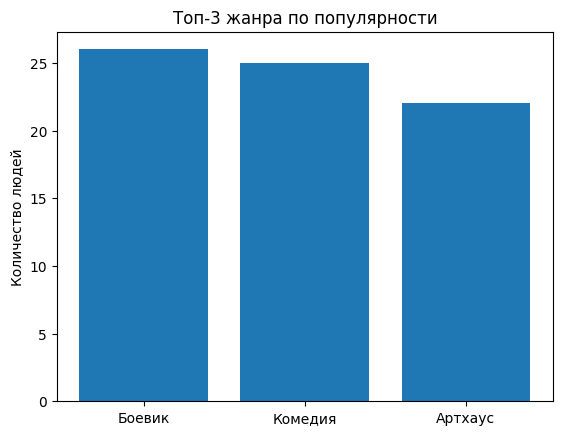

Когда смотрят разные жанры:
 watch_time      Вечер  День  Ночь  Утро
favorite_genre                         
Артхаус             3     7     7     5
Боевик              7     6     8     5
Драма               1     5     5     2
Комедия             6     3     9     7
Фантастика          4     3     4     3


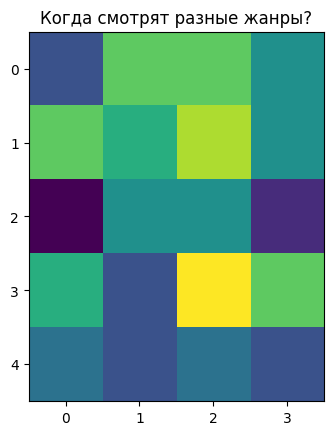

Среднее количество фильмов в неделю:
 platform
YouTube      5.250000
Другое       4.793103
Netflix      4.217391
КиноПоиск    3.857143
Name: movies_per_week, dtype: float64


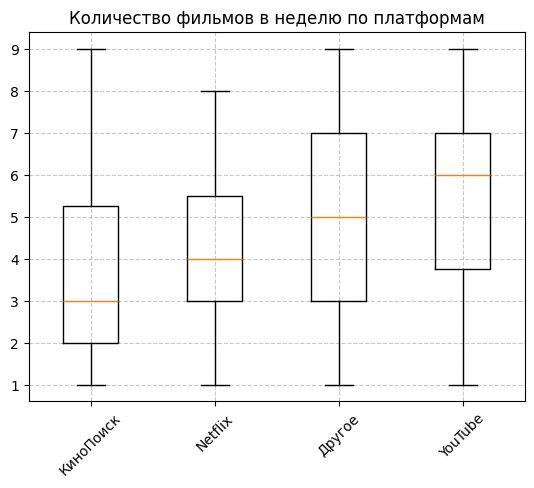

    age   gender favorite_genre watch_time   platform  movies_per_week
0    24  Женщина        Комедия       Утро  КиноПоиск                3
1    21  Мужчина         Боевик       Утро    Netflix                7
2    22  Мужчина     Фантастика       День  КиноПоиск                2
3    24  Мужчина         Боевик      Вечер     Другое                2
4    20  Мужчина     Фантастика      Вечер    YouTube                7
..  ...      ...            ...        ...        ...              ...
95   23  Мужчина        Комедия       День     Другое                7
96   19  Мужчина          Драма       Ночь    Netflix                1
97   21  Мужчина        Комедия      Вечер     Другое                8
98   23  Женщина        Артхаус      Вечер    Netflix                2
99   22  Женщина         Боевик       День     Другое                3

[100 rows x 6 columns]


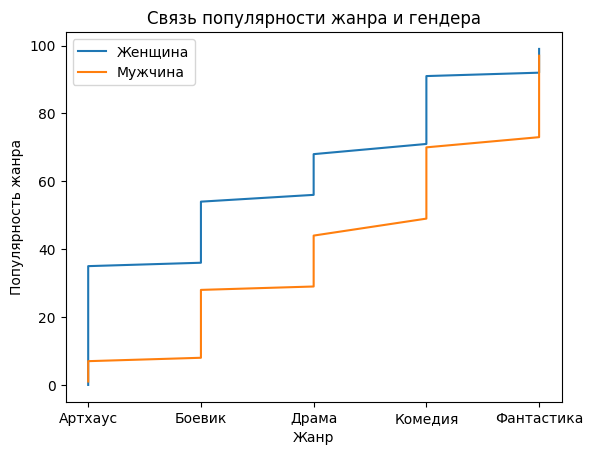

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Создаем искусственные данные
np.random.seed(42)
data = {
    'age': np.random.randint(18, 26, 100),  # 100 человек 18-25 лет
    'gender': np.random.choice(['Женщина', 'Мужчина'], 100),
    'favorite_genre': np.random.choice(['Комедия', 'Драма', 'Артхаус', 'Боевик', 'Фантастика'], 100),
    'watch_time': np.random.choice(['Утро', 'День', 'Вечер', 'Ночь'], 100),
    'platform': np.random.choice(['КиноПоиск', 'Netflix', 'YouTube', 'Другое'], 100),
    'movies_per_week': np.random.randint(1, 10, 100)
}

df = pd.DataFrame(data)


#Топ-3 жанра по популярности
genre_counts = df['favorite_genre'].value_counts().head(3)
print("Топ-3 жанра:\n", genre_counts)
# Визуализация
x=genre_counts.index
y=genre_counts.values
plt.bar(x, y)
plt.title('Топ-3 жанра по популярности')
plt.ylabel('Количество людей')
plt.show()


#Связь жанра и времени просмотра
cross_tab = pd.crosstab(df['favorite_genre'], df['watch_time'])
print("Когда смотрят разные жанры:\n", cross_tab)
# Тепловая карта
plt.imshow(cross_tab, cmap='viridis')
plt.title('Когда смотрят разные жанры?')
plt.show()


#Среднее количество фильмов в неделю по платформам
platform_stats = df.groupby('platform')['movies_per_week'].mean().sort_values(ascending=False)
print("Среднее количество фильмов в неделю:\n", platform_stats)
#boxplot
data = []
labels = []
for platform in df['platform'].unique():
    data.append(df[df['platform'] == platform]['movies_per_week'].values)
    labels.append(platform)
plt.boxplot(data, tick_labels=labels)
plt.title('Количество фильмов в неделю по платформам')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(df)
#Связь популярности жанра и гендера
df1=df.query('gender=="Женщина"')
x1=df1['favorite_genre'].sort_values( axis=0, ascending=True)
y1=df1['favorite_genre'].index

df2=df.query('gender=="Мужчина"')
x2=df2['favorite_genre'].sort_values( axis=0, ascending=True)
y2=df2['favorite_genre'].index

fig, ax = plt.subplots()
ax.set_title("Связь популярности жанра и гендера")
ax.plot(x1, y1, label='Женщина')
ax.plot(x2, y2, label='Мужчина')

ax.set_xlabel('Жанр')
ax.set_ylabel('Популярность жанра')
ax.legend()
plt.show()